# Titanic: Machine Learning from Disaster From Kaggle
#  Author: jz1g17@soton.ac.uk

In [1]:
#####################################################################################################

# **step 1: check the DATASET**

In [2]:
import pandas as pd

** Train data**

In [3]:
# load dataset
train = pd.read_csv("train.csv")
# display rows and columns of dataset
train.shape

(891, 12)

In [4]:
# display dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| **Variable** | **Definition** | **Key** |
 |:------ | :------ | :------ |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [5]:
# display the general information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**It could find the data of AGE, CABIN and EMBARKED has missing value;
Name, Sex, Ticket, Cabin and Embarked are strings**

In [6]:
# display genaral statistics information of dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**It could find 38.3% passenger survivied with avrage age 29.699(ingnore missing value)**

** Test data**

In [7]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**It could find Age, Fare and Cabin have missing value**

# step 2: Clean dataset

Transform SEX, CABIN and EMBAREKT to numerical data

In [9]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler() # scaling big numbers

# fill NaN data and transform string to integer
def cleandata(inputdata):
    # Sex
    def obtainSex(Sex):
        if Sex == "male":
            return 1
        elif Sex == "female":
            return 0
    inputdata["Sex"] = inputdata["Sex"].apply(obtainSex) # set male to 1 and female to 0
    # Age
    inputdata["Age"] = inputdata["Age"].fillna(inputdata["Age"].median()) # fill age with median value of age # another method: fit
    #age_scale_param = scaler.fit([inputdata["Age"]]) # set scaling paramteres of age
    #inputdata["Age"] = scaler.fit_transform([inputdata["Age"]], age_scale_param) # scaling age
    # Fare
    inputdata["Fare"] = inputdata["Fare"].fillna(inputdata["Fare"].median())# fill Fare with median value of age
    #fare_scale_param = scaler.fit([inputdata["Fare"]]) # set scaling paramteres of age
    #inputdata["Fare"] = scaler.fit_transform(inputdata["Fare"], fare_scale_param) # scaling age
    # Cabin
    inputdata["Cabin"] = inputdata["Cabin"].fillna(0)
    def obtainCabin(Cabin):
        if Cabin == 0:
            return 0
        else:
            return 1
    inputdata["Cabin"] = inputdata["Cabin"].apply(obtainCabin) # set cabin information with 1 and missing value to 0
    # Embraked
    def obtainEmbraked(Embarked):
        if Embarked == "C":
            return 0
        elif Embarked == "Q":
            return 1
        else:
            return 2
    inputdata["Embarked"] = inputdata["Embarked"].apply(obtainEmbraked) # C = Cherbourg = 0, Q = Queenstown = 1, S = Southampton = 2
    
    return inputdata

# Clean data
traindata = cleandata(train)
testdata = cleandata(test)

# step 3: Feature Engineering

In [10]:
features1 = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]
features2 = ["PassengerId", "Survived"]
features3 = ["PassengerId"]
#traindata[features2].head()
train_data = traindata[features1]
result_train = traindata[features2]
x_train = train_data.values # trainning data with feature1 peremeters
y_train = result_train.values[:,1] # label of survivd condition
test_data = testdata[features1]
result_test = testdata[features3]
x_test = test_data.values # test data with feature1 peremeters
y_test = result_test.values # passenger ID in test data

# step 4: Keras application

In [11]:
from keras.layers import *
from keras.models import Sequential, Model
from keras.utils import plot_model;
import keras

Using TensorFlow backend.


In [12]:
dim = x_train.shape[1] # dimentional of train data
model = Sequential()
model.add(Dense(100, input_dim=dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, input_dim=dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
#plot_model(model, to_file = 'model_for_titanic.png', show_shapes = True)

In [13]:
idx = list(range(x_train.shape[0]))
np.random.shuffle(idx)
hist = model.fit(x_train[idx],y_train[idx],validation_split=0.15,epochs=200,shuffle=True, batch_size = 16)
dnn_predict = model.predict_classes(x_test)

Train on 757 samples, validate on 134 samples
Epoch 1/200
757/757 [==============================] - 0s 552us/step - loss: 2.8199 - acc: 0.5707 - val_loss: 1.2273 - val_acc: 0.6493
Epoch 2/200
757/757 [==============================] - 0s 103us/step - loss: 2.3535 - acc: 0.5561 - val_loss: 0.8181 - val_acc: 0.7164
Epoch 3/200
757/757 [==============================] - 0s 100us/step - loss: 1.7491 - acc: 0.5601 - val_loss: 0.6628 - val_acc: 0.6866
Epoch 4/200
757/757 [==============================] - 0s 105us/step - loss: 1.2341 - acc: 0.6129 - val_loss: 0.6666 - val_acc: 0.7090
Epoch 5/200
757/757 [==============================] - 0s 98us/step - loss: 1.0067 - acc: 0.6037 - val_loss: 0.6516 - val_acc: 0.7090
Epoch 6/200
757/757 [==============================] - 0s 99us/step - loss: 0.9071 - acc: 0.6407 - val_loss: 0.6438 - val_acc: 0.7090
Epoch 7/200
757/757 [==============================] - 0s 103us/step - loss: 0.8247 - acc: 0.6209 - val_loss: 0.6767 - val_acc: 0.5821
Epoch 8/200

In [14]:
# combine predict result to testdata
y_label=[]
for n in range(0,len(dnn_predict)):
    y_label.append(dnn_predict[n])
y_id=[]
for n in range(0,len(y_test)):
    a = int(y_test[n])
    y_id.append(a)
result = pd.DataFrame({'PassengerId': y_id,
                      'Survived': y_label   
})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [15]:
import matplotlib.pyplot as plt

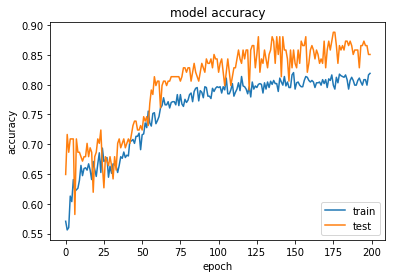

In [16]:

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

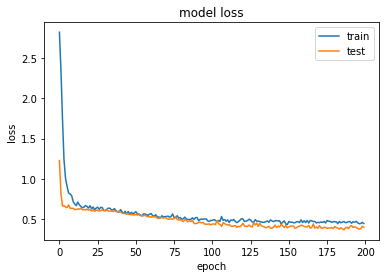

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [18]:
result.to_csv('jz1g17_Titanic_submission.csv')